Script for 'amazon_fires' program in Python<br>
Licensed under the Apache License, Version 2.0<br>
http://www.apache.org/licenses/LICENSE-2.0

The program parses a csv file containing the data of Amazon forest fires for the years 1998-2017, and then produces and histogram plot of the result. The initial file 'rf_incendiosflorestais_focoscalor_estados_1998-2017.csv' was downloaded from the Brazilian Ministry of the Environment website:<br>
https://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif*

In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults() 
from googletrans import Translator
import pandas as pd
import csv

In [26]:
filename = 'rf_incendiosflorestais_focoscalor_estados_1998-2017.csv'

In [27]:
# With 'filename' as input, generates a file 'amazon_fires.csv' with data organised into 5 columns:
with open(filename, 'r') as input_f:
  reader = csv.reader(input_f)
  next(reader)
  with open('amazon_fires.csv', 'w', newline='') as target_f:
    writer = csv.writer(target_f)
    for row in reader:
      lst = row[0].split('\t')
      writer.writerow(lst)

In [28]:
# Puts in DataFrame 'data' the file 'amazon_fires.csv', with header in English, and no point for thousands;
# Puts in 'months_unique' the list of months (in portuguese) of the month column:
data = pd.read_csv('amazon_fires.csv', names=['year', 'state', 'month', 'number', 'date'], thousands = '.')
months_unique = list(data.month.unique())

In [29]:
# Puts in SeriesGroupBy 'fires_per_month' the sum of fires over all years, for each month;
# Reindexes the result like in the list 'months_unique' with .reindex();
# Converts the result to a DataFrame with .to_frame();
# Resets the index of the result with .reset_index(inplace=True):
fires_per_month = data.groupby('month')['number'].sum()
fires_per_month = fires_per_month.reindex(months_unique)
fires_per_month = fires_per_month.to_frame()
fires_per_month.reset_index(inplace=True)

In [30]:
# Translates to English the entries of the 'month' column:
translator = Translator()
for i, month_pt in enumerate(fires_per_month['month']):
  month_en = translator.translate(month_pt, src='pt').text
  fires_per_month.at[i,'month'] = month_en

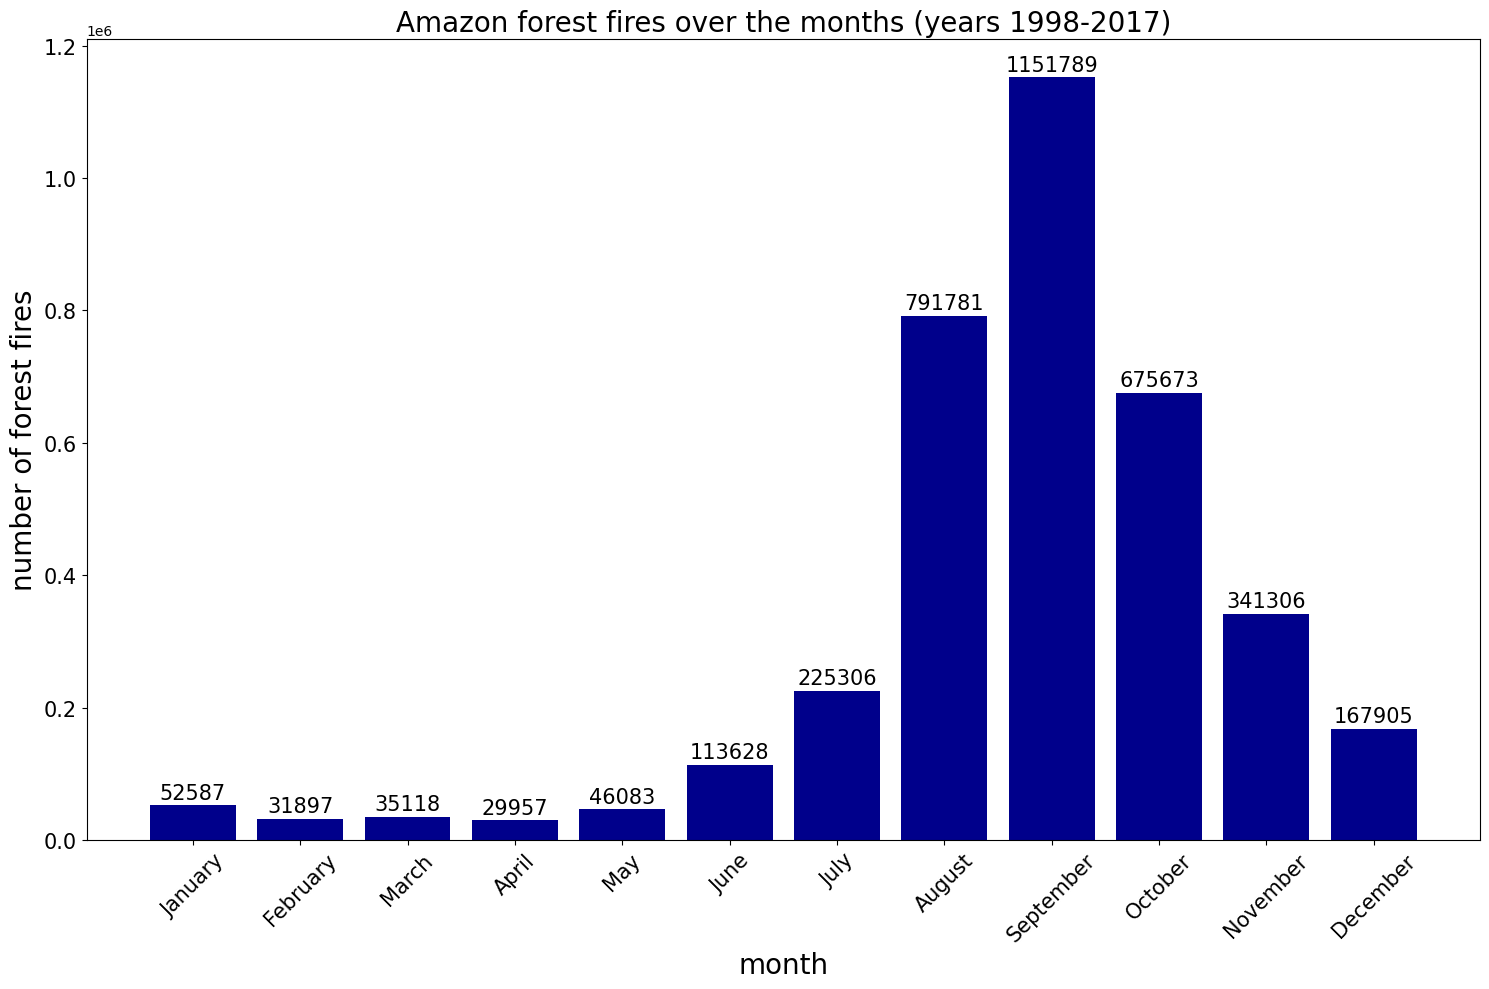

In [31]:
# Creates a figure of histogram type, and specifies specs of title, xlabel and ylabel:
figure = plt.figure(figsize=(15,10))
plt.bar(fires_per_month['month'], fires_per_month['number'], color = 'darkblue')
plt.title('Amazon forest fires over the months (years 1998-2017)', fontsize=20)
plt.xlabel('month', fontsize=20) 
plt.ylabel('number of forest fires', fontsize=20)

# Writes the number of fires above the histogram bars:
for i, num in enumerate(fires_per_month['number']):
    plt.text(i, num + 10000, num, ha='center', fontsize=15)

# Sets properties of an artist object with plt.setp();
# Gets current axes of the current figure with plt.gca();
# Gets x-axis and y-axis tick labels with .get_xticklabels() and .get_yticklabels():
plt.setp(plt.gca().get_xticklabels(), rotation=45, fontsize=15)
plt.setp(plt.gca().get_yticklabels(), fontsize=15)

# Adjusts the figure layout and saves it in 'fires_histogram.png':
plt.tight_layout()
figure.savefig('amazon_fires.png')